Predicting the price of used cars depending on its specifications (features)

importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

reading raw data from csv file using pandas


In [2]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


PREPROCESSING

describe the data set (including categorical data)

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


determining variables of interest

In [4]:
new_data = raw_data.drop('Model',axis =1)
new_data.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


dealing with missing values


finding the missing values

In [5]:
new_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

isnull() returns false for the value which is not null (false = 0) ; returns true for the value which is null (true =1) so sum of all the true values will give us the number of missing values for the feature similarly if the sum is 0 then there are no missing values 

we can remove all the missing observations if the missing values is less than 5% of the total values 


In [6]:
data_no_mv = new_data.dropna()


In [7]:
data_no_mv.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


exploring probability distribution function using seaborn

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

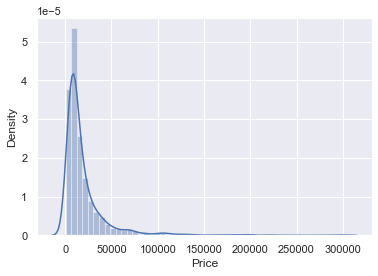

In [8]:
sns.distplot(data_no_mv['Price'])

we need to deal with outliers (which stays at abnormal distance from the other observations in the data) and make it as much as close to normal dist function

we can remove top 1% of the observations 

In [9]:
q = data_no_mv['Price'].quantile(0.99)
q

129812.51999999981

we will keep the price values below this quantile value (q) and will assign this to data_1 so that outliners are dealt

In [10]:
temp = data_no_mv['Price']<q
data_1 = data_no_mv[temp]

In [11]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

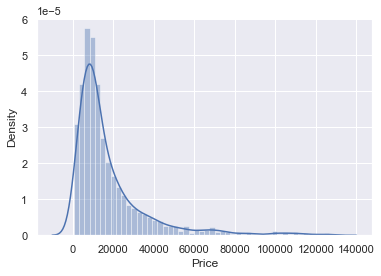

In [12]:
sns.distplot(data_1['Price'])

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

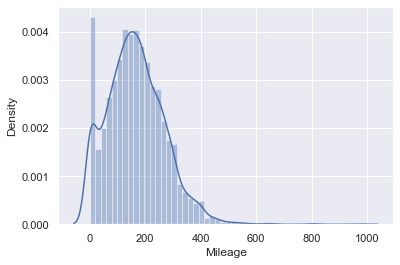

In [13]:
sns.distplot(data_1['Mileage'])

In [14]:
q1 = data_1['Mileage'].quantile(0.99)
temp = data_1['Mileage']<q1
data_2 = data_1[temp]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

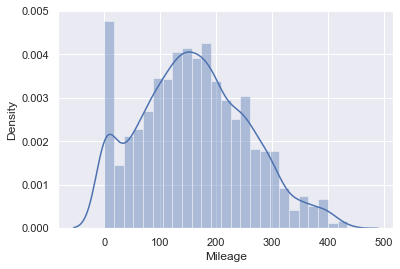

In [15]:
sns.distplot(data_2['Mileage'])

In [16]:
temp = data_2['EngineV'] <6.5
data_3 = data_2[temp]
data_3.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

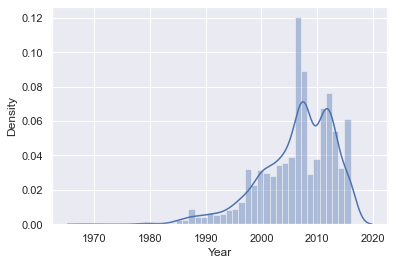

In [17]:
sns.distplot(data_3['Year'])

In [18]:
q3 = data_3['Year'].quantile(0.01)
temp = data_3['Year']>q3
data_4 = data_3[temp]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


In [19]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [20]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Checking OLS assumptions

Checking Linearity 

Text(0, 0.5, 'Price')

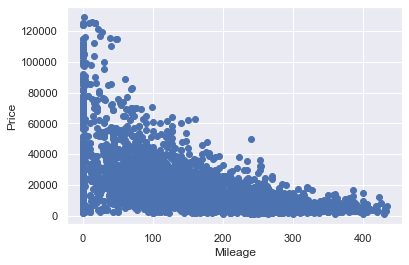

In [21]:
#scatter plot for price vs mileage
plt.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

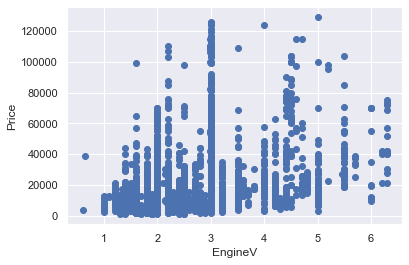

In [22]:
#scatter plot for price vs EngineV
plt.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
plt.xlabel('EngineV')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

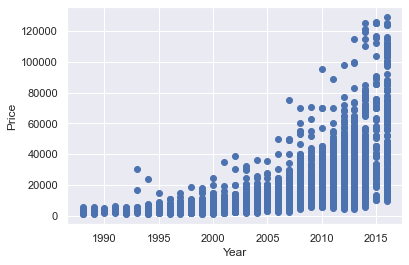

In [23]:
#scatter plot for price vs year
plt.scatter(data_cleaned['Year'],data_cleaned['Price'])
plt.xlabel('Year')
plt.ylabel('Price')

Log transformation are useful when facing exponential issues

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0, 0.5, 'Log Price')

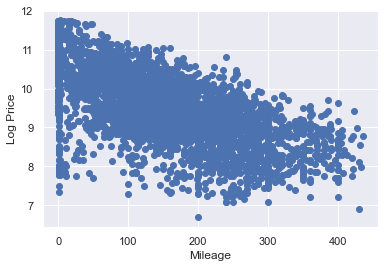

In [25]:
#scatter plot for price vs mileage
plt.scatter(data_cleaned['Mileage'],data_cleaned['Log Price'])
plt.xlabel('Mileage')
plt.ylabel('Log Price')

Text(0, 0.5, 'Log Price')

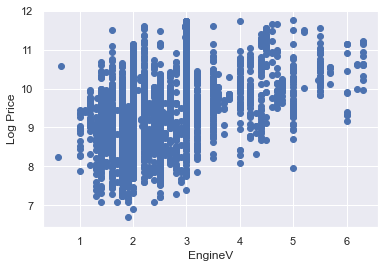

In [26]:
#scatter plot for price vs EngineV
plt.scatter(data_cleaned['EngineV'],data_cleaned['Log Price'])
plt.xlabel('EngineV')
plt.ylabel('Log Price')

Text(0, 0.5, 'Log Price')

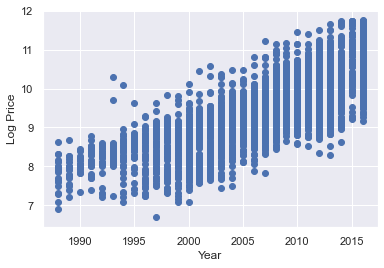

In [27]:
#scatter plot for price vs year
plt.scatter(data_cleaned['Year'],data_cleaned['Log Price'])
plt.xlabel('Year')
plt.ylabel('Log Price')

Droping price from data_cleaned

In [28]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

In [29]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [30]:
#Compute VIF data for each independent variable (checking muticollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["features"] = variables.columns
vif["vif_Factor"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,features,vif_Factor
0,Mileage,3.791584
1,Year,10.354854
2,EngineV,7.662068


VIF should be < 10 so removing Year

In [31]:
data_no_mul = data_cleaned.drop(['Year'], axis = 1)
data_no_mul.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


Creating Dummies for Categorical data

In [32]:
data_dummies = pd.get_dummies(data_no_mul,drop_first = True)
data_dummies

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [33]:
#Compute VIF data for each independent variable (checking muticollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_temp = data_dummies.drop('Log Price', axis = 1)
variables = data_temp
vif = pd.DataFrame()
vif["features"] = variables.columns
vif["vif_Factor"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,features,vif_Factor
0,Mileage,4.459662
1,EngineV,7.841729
2,Brand_BMW,2.294007
3,Brand_Mercedes-Benz,2.868649
4,Brand_Mitsubishi,1.641712
5,Brand_Renault,2.086774
6,Brand_Toyota,2.162166
7,Brand_Volkswagen,2.844515
8,Body_hatch,1.464260
9,Body_other,1.534059


In [34]:
vif["features"]

0                 Mileage
1                 EngineV
2               Brand_BMW
3     Brand_Mercedes-Benz
4        Brand_Mitsubishi
5           Brand_Renault
6            Brand_Toyota
7        Brand_Volkswagen
8              Body_hatch
9              Body_other
10             Body_sedan
11             Body_vagon
12               Body_van
13        Engine Type_Gas
14      Engine Type_Other
15     Engine Type_Petrol
16       Registration_yes
Name: features, dtype: object

# Rearrange the col

In [35]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
cols =['Log Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

data_preprocessed = data_dummies[cols]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression


In [37]:
#declaring the inputs 

target = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'], axis = 1)

In [38]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [39]:
#scaling inputs
inputs_scaled = scaler.transform(inputs)

In [40]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target, test_size = 0.2, random_state = 365)

In [41]:
reg = LinearRegression()

reg.fit(x_train,y_train)


LinearRegression()

In [42]:
reg.score(x_train,y_train)

0.744996578792662

In [43]:
reg.score(x_test,y_test)

0.7726984972665857

In [44]:
yhat = reg.predict(x_train)

(6.0, 13.0)

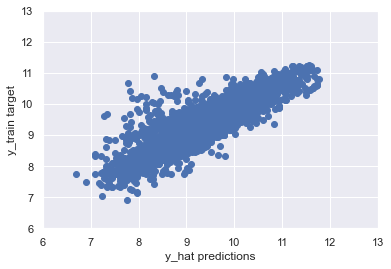

In [45]:
plt.scatter(y_train,yhat)
plt.xlabel('y_hat predictions')
plt.ylabel('y_train target')
plt.xlim(6,13)
plt.ylim(6,13)

# Residual plot

Residuals are differences between target and predictions

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log Price', ylabel='Density'>

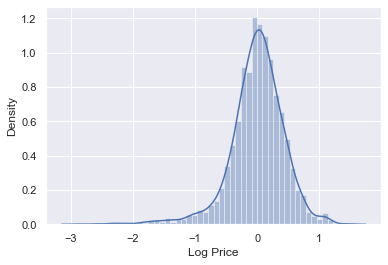

In [46]:
sns.distplot(y_train - yhat)

In [47]:
reg.score(x_train,y_train)

0.744996578792662

In [48]:
reg.intercept_

9.415239458021299

In [49]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [50]:
reg_sum = pd.DataFrame({'Features': inputs.columns , 'Weights': reg.coef_})
reg_sum

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


# testing

In [51]:
reg.fit(x_test,y_test)
yhat_test = reg.predict(x_test)

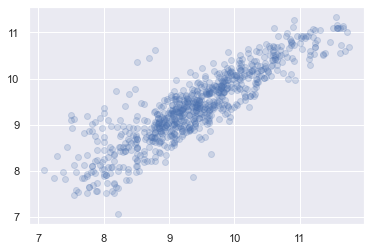

In [52]:
plt.scatter(y_test,yhat_test, alpha =0.2)

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log Price', ylabel='Density'>

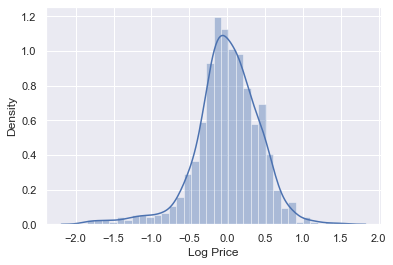

In [53]:
sns.distplot(y_test-yhat_test)

In [54]:
df_sum = pd.DataFrame({'Predictions': np.exp(yhat_test)})
df_sum['Targets'] = y_test
df_sum

,Predictions,Targets
0,9858.696346,NaN
1,3377.507852,8.974618
2,7059.282545,NaN
3,7995.116045,NaN
4,10550.016657,NaN
...,...,...
769,27203.108786,8.846497
770,10496.700978,NaN
771,14658.551205,NaN
772,33712.287220,NaN


In [55]:
y_test = y_test.reset_index(drop = True)
y_test

0       7.740664
1       7.937375
2       7.824046
3       8.764053
4       9.121509
         ...    
769    10.292146
770     9.169518
771     9.814656
772    11.134589
773     9.287301
Name: Log Price, Length: 774, dtype: float64

In [56]:
df_sum = pd.DataFrame({'Predictions': np.exp(yhat_test)})
df_sum['Targets'] = np.exp(y_test)
df_sum

,Predictions,Targets
0,9858.696346,2300.0
1,3377.507852,2800.0
2,7059.282545,2500.0
3,7995.116045,6400.0
4,10550.016657,9150.0
...,...,...
769,27203.108786,29500.0
770,10496.700978,9600.0
771,14658.551205,18300.0
772,33712.287220,68500.0


In [57]:
df_sum['Residuals'] = df_sum['Targets'] - df_sum['Predictions']
df_sum['%Diff'] = np.abs(df_sum['Residuals']/df_sum['Targets']*100)

In [58]:
pd.options.display.max_rows = 999
df_sum.sort_values(by = '%Diff')

,Predictions,Targets,Residuals,%Diff
565,7108.661154,7100.00,-8.661154,0.121988
31,12678.256847,12650.00,-28.256847,0.223374
387,45111.972097,44999.00,-112.972097,0.251055
130,17949.781960,18000.00,50.218040,0.278989
94,7773.066972,7800.00,26.933028,0.345295
714,23089.472274,22999.00,-90.472274,0.393375
506,3213.709711,3200.00,-13.709711,0.428428
144,12830.430884,12900.00,69.569116,0.539295
497,51778.444372,51500.00,-278.444372,0.540669
682,4971.450382,5000.00,28.549618,0.570992
